## Projet Segmentation clientèles

### Problème business:

- Analyse détaillée des clients de l'entreprise et segmentation

### Mission:

- Analyse exploratoire et preprocessing

### Descriptif des données

ID : Identifiant unique du client


Year_Birth : année de naissance du client

Éducation : niveau d'éducation du client

Marital_Status : état civil du client

Revenu : Revenu annuel du ménage du client

Kidhome : nombre d'enfants dans le ménage du client

Teenhome : Nombre d'adolescents dans le ménage du client

Dt_Customer : Date d'inscription du client auprès de l'entreprise

Récence : nombre de jours depuis le dernier achat du client

Plainte : 1 si le client s'est plaint au cours des 2 dernières années, 0 sinon



MntWines : Montant dépensé pour le vin au cours des 2 dernières années

MntFruits : Montant dépensé en fruits au cours des 2 dernières années

MntMeatProducts : montant dépensé pour la viande au cours des 2 dernières années

MntFishProducts : montant dépensé pour le poisson au cours des 2 dernières années

MntSweetProducts : montant dépensé en sucreries au cours des 2 dernières années

MntGoldProds : Montant dépensé en or au cours des 2 dernières années


NumDealsPurchases : nombre d'achats effectués avec une remise

AcceptedCmp1 : 1 si le client a accepté l'offre lors de la 1ère campagne, 0 sinon

AcceptedCmp2 : 1 si le client a accepté l'offre lors de la 2ème campagne, 0 sinon

AcceptedCmp3 : 1 si le client a accepté l'offre dans la 3ème campagne, 0 sinon

AcceptedCmp4 : 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon

AcceptedCmp5 : 1 si le client a accepté l'offre lors de la 5ème campagne, 0 sinon

Réponse : 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon


NumWebPurchases : nombre d'achats effectués sur le site Web de l'entreprise

NumCatalogPurchases : Nombre d'achats effectués à l'aide d'un catalogue

NumStorePurchases : Nombre d'achats effectués directement en magasin

NumWebVisitsMonth : nombre de visites sur le site Web de l'entreprise au cours du dernier mois




### Librairies

In [97]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import dateutil

from missingno import matrix

In [2]:
os.getcwd()

'C:\\Users\\Joel\\Desktop\\Clustering'

### Données

In [3]:
DF = pd.read_table('clustering.csv')
DF.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Analyse Exploratoire

In [4]:
df = DF.copy()

In [5]:
pd.set_option('display.max_columns', df.shape[1])

In [6]:
print("Nombre de lignes: ", df.shape[0])

Nombre de lignes:  2240


In [7]:
print("Nombre de colonnes: ", df.shape[1])

Nombre de colonnes:  29


### Types de données

In [8]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

La plupart des variables sont quantitatives sauf les variables: 

- Education (Niveau d'éducation du client), 
- Marietal_Status (Etat civil du client) 
- Dt_Customer(Date d'inscription du clients auprès de l'entreprises)

In [9]:
for col in df:
    unique_vals = df[col].unique()
    nr_val = df[col].nunique()
    if nr_val < 10:
        print("Nombre de valeur de {} :{} -- {}".format(col, nr_val, unique_vals))
    else:
        print("Nombre de valeur de {} :{}".format(col, nr_val))

Nombre de valeur de ID :2240
Nombre de valeur de Year_Birth :59
Nombre de valeur de Education :5 -- ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Nombre de valeur de Marital_Status :8 -- ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Nombre de valeur de Income :1974
Nombre de valeur de Kidhome :3 -- [0 1 2]
Nombre de valeur de Teenhome :3 -- [0 1 2]
Nombre de valeur de Dt_Customer :663
Nombre de valeur de Recency :100
Nombre de valeur de MntWines :776
Nombre de valeur de MntFruits :158
Nombre de valeur de MntMeatProducts :558
Nombre de valeur de MntFishProducts :182
Nombre de valeur de MntSweetProducts :177
Nombre de valeur de MntGoldProds :213
Nombre de valeur de NumDealsPurchases :15
Nombre de valeur de NumWebPurchases :15
Nombre de valeur de NumCatalogPurchases :14
Nombre de valeur de NumStorePurchases :14
Nombre de valeur de NumWebVisitsMonth :16
Nombre de valeur de AcceptedCmp3 :2 -- [0 1]
Nombre de valeur de AcceptedCmp4 :2 -- [0 1]
Nombre de valeur

**Les variables AcceptedCmp1, AcceptedCmp2, AcceptedCmp3/ AcceptedCmp4 et AcceptedCmp5 peuvent être regrouper lors de l'analyse exploratoire**

- 

- On constate que le nombre de modalités des variables est au compris entre 1 (Z_CostContact, Z_Revenue)  et 2240 (ID)
- Il semble que certaines variables ont déjà été encodées (Encodage disjoint):
    - AcceptedCmp1
    - AcceptedCmp2
    - AcceptedCmp3
    - AcceptedCmp4

In [32]:
for col in df:
    if df[col].nunique() <= 2:
        print(col)

AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Z_CostContact
Z_Revenue
Response


- 9 variables ont un nombre de modalité inf ou égale à 2
 
 - AcceptedCmp3
 - AcceptedCmp4
 - AcceptedCmp5
 - AcceptedCmp1
 - AcceptedCmp2
 - Complain
 - Response
 
- 20 variables ont un nombre de modalité supérieur à 2

## Visualisation

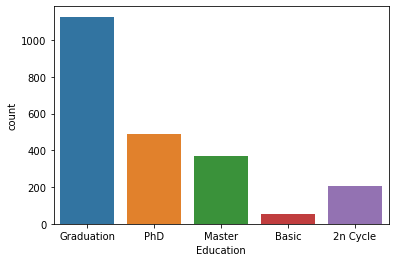

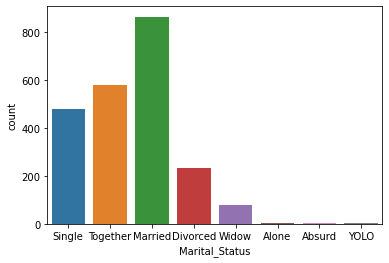

In [40]:
for col in df.select_dtypes(include=object):
    if col not in 'Dt_Customer':
        plt.figure()
        sns.countplot(df[col])

- La plupart des individus sont diplomés
- Les individus sont le plus souvent mariés

- On pourra si possible regrouper les individus:
    - Education ayant le PHD et Master pour optimiser l'algorithme de Kmeans
    - Statut Marietal, Alone, Absurd et YOLO

In [42]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

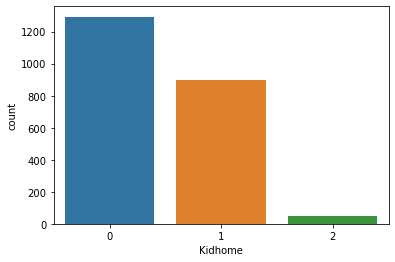

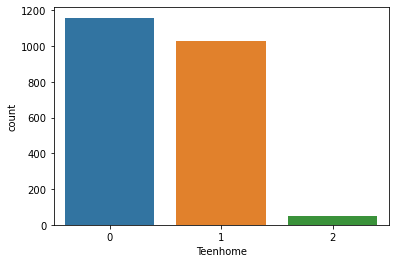

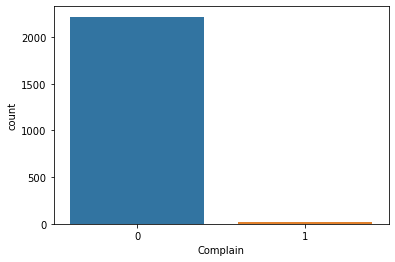

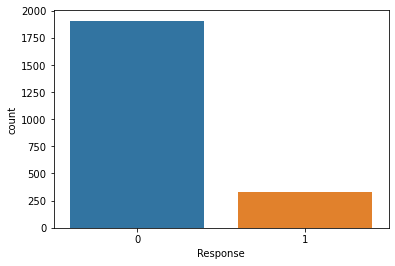

In [45]:
for col in df.select_dtypes(exclude=object):
    unique_vals = df[col].unique()
    nr_val = df[col].nunique()
    if nr_val < 10 and col not in ['Z_CostContact', 'Z_Revenue', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']:
        plt.figure()
        sns.countplot(df[col])

- La majorité des clients n'ont pas d'enfant (Kidhome)
- La plupart des clients ont au moins un adolescent dans leur ménage (Teenhome)
- La plupart des clients n'ont pas acceptés l'offre lors de la dernière campagne (Response)
- La majorité des clients ne sont pas plaint au cours de ces deux dernières années (Complainte)

In [ ]:
['Z_CostContact', 'Z_Revenue', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

### Variable Accepted

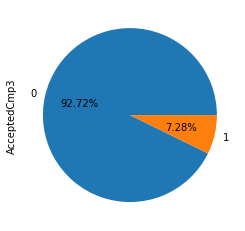

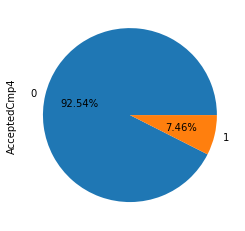

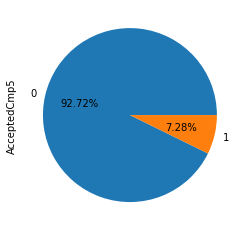

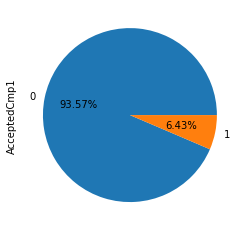

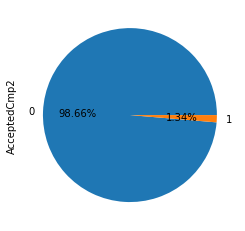

In [20]:
for col in df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']]:
    plt.figure()
    df[col].value_counts().plot.pie(autopct= "%1.2f%%")

- Les individus ayant accepter l'offre après un nombre n de campagne sont tout au plus dans l'ordre de 7%
- On pourra plutart les regrouper pour voir leur impacte sur les Kmeans

In [14]:
df['Accept'] = 0

df['Accept'].loc[(df['AcceptedCmp1']==1) | (df['AcceptedCmp2']==1) | (df['AcceptedCmp3']==1) | (df['AcceptedCmp4']==1) | (df['AcceptedCmp5']==1)] = 1

In [15]:
df['Accept'].replace([0, 1], ["Non", "Oui"], inplace=True)

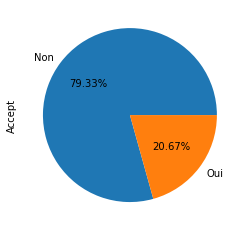

In [16]:
df['Accept'].value_counts().plot.pie(autopct= "%1.2f%%");

- Seulement 21% de clients ont accepté l'offre lors de l'ensemble des campagnes réalisées
- Pourra peut être servir pour optimiser le kmeans

In [22]:
print("P1: ", df['AcceptedCmp1'].value_counts()[1])
print("P2: ", df['AcceptedCmp2'].value_counts()[1])
print("P3: ", df['AcceptedCmp3'].value_counts()[1])
print("P4: ", df['AcceptedCmp4'].value_counts()[1])
print("P5: ", df['AcceptedCmp5'].value_counts()[1])

P1:  144
P2:  30
P3:  163
P4:  167
P5:  163


### Depense

In [98]:
df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


- La plupart des clients consomment en générale plus de Vin (moyenne = 303,935);
- Le montant maximal de dépense est accordé à l'achat de la viande

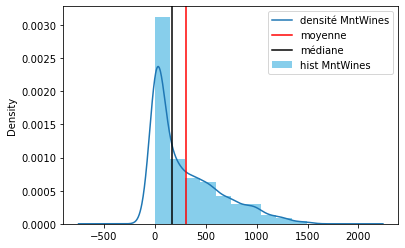

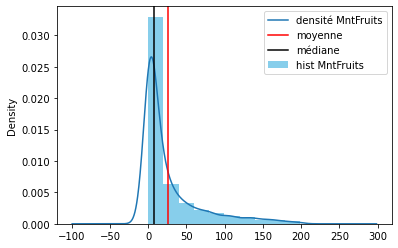

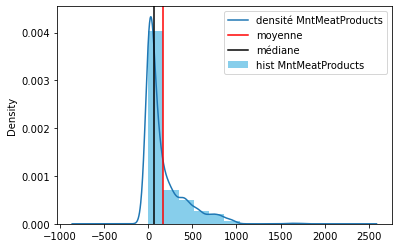

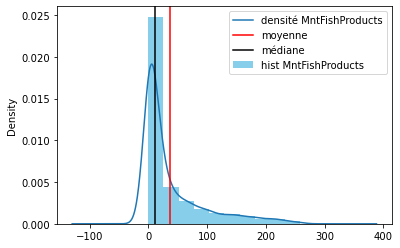

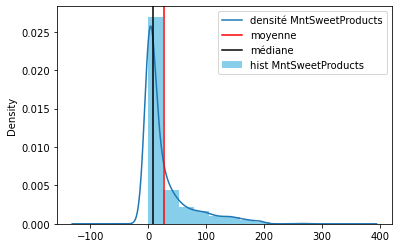

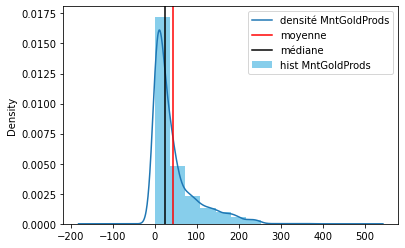

In [101]:
for col in df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]:
    plt.figure()
    plt.hist(df[col], bins=10, density=True, label= 'hist '+col, color='skyblue')
    df[col].plot(kind ="density", label = 'densité ' + col)
    plt.axvline(x = df[col].mean(), c ='r', label='moyenne')
    plt.axvline(x = df[col].median(), c ='black', label='médiane')
    plt.legend()

- 50% des dépenses sont inférieures à la moyenne (médiane < moyenne dans toutes les dépenses possibles)
- Les distributions semblent être asymétrique (Cela pourra être confirmé par un test de normalité) => **Distribution étalée à gauche**

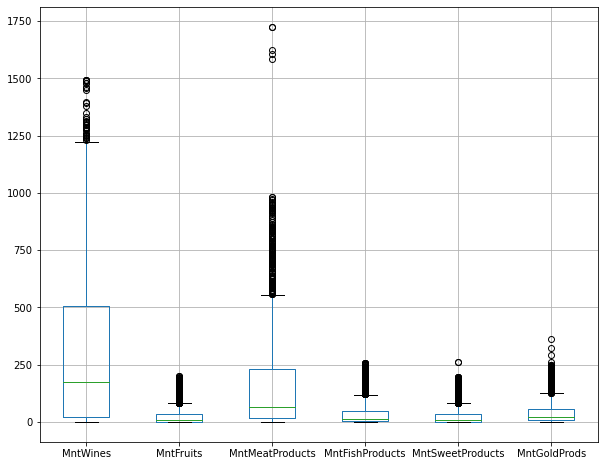

In [63]:
plt.figure(figsize=(10, 8))
df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].boxplot()

- Présence de valeurs abérrantes

#### Revenu

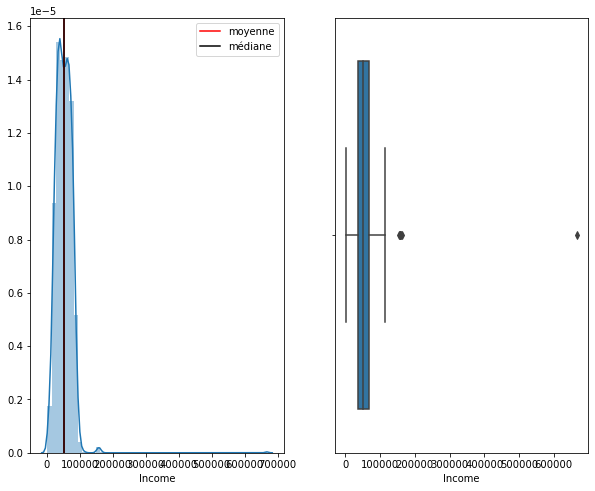

In [60]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
#plt.hist(df['Income'], bins=10, density=True, label= 'hist Revenu', color='skyblue')
sns.distplot(df['Income'])
# df['Income'].plot(kind ="density", label = 'densité Revenu')
plt.axvline(x = df['Income'].mean(), c ='r', label='moyenne')
plt.axvline(x = df['Income'].median(), c ='black', label='médiane')
plt.legend();
plt.subplot(1, 2, 2)
sns.boxplot(df['Income'])

- Le revenu moyen est de 52247.25 Unité monétaire
- Le revenu le plus faible est de 1730 tandis que le plus élevé est de 666666 unité monétaire
- Les revenus sont normalement distribués (moyenne = Médiane)
- Il existe des Valeurs abérrantes

- Présence des valeurs abérrantes

### Nombre d'achat

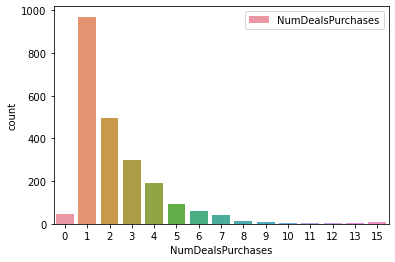

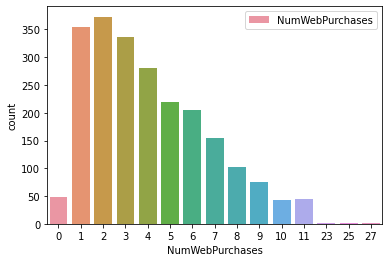

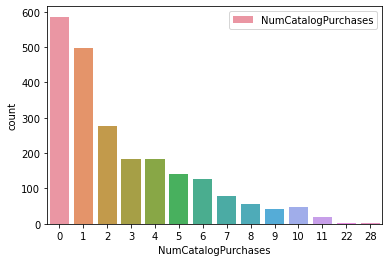

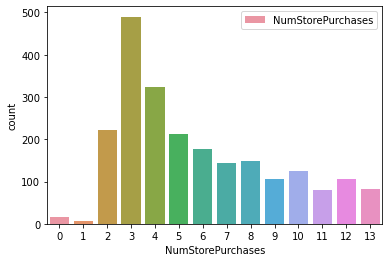

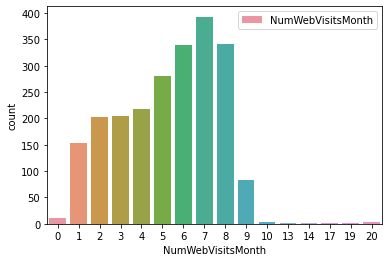

In [118]:
for col in df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]:
    plt.figure()
    sns.countplot(df[col], label=col)
    plt.legend()

- La plupart des achats effectués avec remise se repartissent entre 1 et 2
- Il y a entre 1 et 8 visites au cours du dernier mois
- nombre d'achats effectués sur le site Web de l'entreprise est compris entre 1 et 7
- Nombre d'achats effectués à l'aide d'un catalogue est compris entre 0 et 2
- Nombre d'achats effectués directement en magasin est compris entre 2 et 7
- nombre de visites sur le site Web de l'entreprise au cours du dernier mois est compris entre 5 et 8

### Tranche d'âge

In [69]:
df['Age'] = abs(df['Year_Birth'] - 2021)

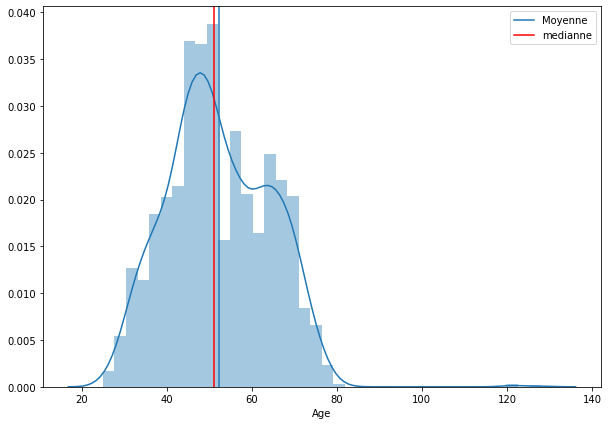

In [79]:
plt.figure(figsize=(10, 7))
sns.distplot(df['Age'])
plt.axvline(df['Age'].mean(), label='Moyenne')
plt.axvline(df['Age'].median(), label='medianne', c='r')
plt.legend();

- Distribution asymétrique étalée à gauche

In [88]:
print(df['Age'].min())
df['Age'].max()

25


128

- Valeurs abérrantes

In [134]:
print("le plus jeune a: ", df['Age'].min())
print("le plus agé a: ", df['Age'].max())

le plus jeune a:  25
le plus agé a:  128


In [123]:
pd.set_option('display.max_rows', 20)

In [124]:
(df['Age']).sort_values(ascending=False)

239     128
339     122
192     121
1950     81
424      80
       ... 
696      26
747      26
995      26
1170     25
46       25
Name: Age, Length: 2240, dtype: int64

#### Discrétisation de l'âge

In [129]:
def categories(x):
    if  25 <= x < 30:
        text = "[25-30["
    elif  30 <= x < 35:
        text = "[30-35["
    elif 35 <= x < 40:
        text = "[35-40["
    elif 40 <= x < 45:
        text = "[40-45["
    elif 45 <= x < 50:
        text = "[45-50["
    elif 50 <= x < 55:
        text = "[50-55["
    elif 55 <= x < 60:
        text = "[55-60["
    elif 55 <= x < 60:
        text = "[55-60["
    elif 60 <= x < 65:
        text = "[60-65["
    elif 65 <= x < 70:
        text = "[65-70["
    elif 70 <= x < 75:
        text = "[70-75["
    elif 75 <= x < 80:
        text = "[75-85["
    elif 80 <= x < 85:
        text = "[80-85["
    else:
        text = "[85 +["
    return text

In [130]:
del df['categories age']

In [131]:
df['categories age'] = df['Age'].map(categories)

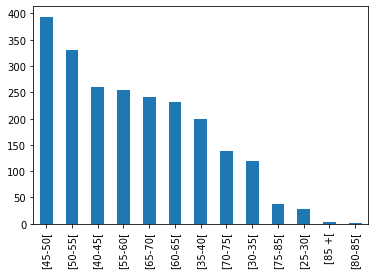

In [132]:
df['categories age'].value_counts().plot.bar()

In [135]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Accept,Age,categories age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,...,4,7,0,0,0,0,0,0,3,11,1,Non,64,[60-65[
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,...,2,5,0,0,0,0,0,0,3,11,0,Non,67,[65-70[
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,...,10,4,0,0,0,0,0,0,3,11,0,Non,56,[55-60[
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,...,4,6,0,0,0,0,0,0,3,11,0,Non,37,[35-40[
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,...,6,5,0,0,0,0,0,0,3,11,0,Non,40,[40-45[


- On constate que la majorité des individus ont entre 45 et 55 ans

### Dt_Customer/Date d'inscription

In [144]:
df['Dt_Customer'].apply(dateutil.parser.parse,dayfirst=True, )

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [172]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Accept,Age,categories age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,...,4,7,0,0,0,0,0,0,3,11,1,Non,64,[60-65[
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,...,2,5,0,0,0,0,0,0,3,11,0,Non,67,[65-70[
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,...,10,4,0,0,0,0,0,0,3,11,0,Non,56,[55-60[
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,...,4,6,0,0,0,0,0,0,3,11,0,Non,37,[35-40[
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,...,6,5,0,0,0,0,0,0,3,11,0,Non,40,[40-45[


In [160]:
int(df['Dt_Customer'].values[0].split('-')[2])

2012

#### Extraction de Jours, Mois, Annee

In [189]:
def extraction(x:pd.Series):
    
    mois = []
    jours = []
    annee = []
    for i in range(0, x.shape[0]):
        jours.append(int(x.values[i].split('-')[0]))
        mois.append(int(x.values[i].split('-')[1]))
        annee.append(int(x.values[i].split('-')[2]))
    return (jours, mois, annee)

In [190]:
del df['Annee'], df['Mois'], df['Jours']

In [191]:
df.insert(df.columns.get_loc('Dt_Customer')+1, "Jours", extraction(df['Dt_Customer'])[0])
df.insert(df.columns.get_loc('Dt_Customer')+2, "Mois", extraction(df['Dt_Customer'])[1])
df.insert(df.columns.get_loc('Dt_Customer')+3, "Annee", extraction(df['Dt_Customer'])[2])

In [192]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Jours,Mois,Annee,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Accept,Age,categories age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,4,9,2012,58,635,88,...,4,7,0,0,0,0,0,0,3,11,1,Non,64,[60-65[
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,8,3,2014,38,11,1,...,2,5,0,0,0,0,0,0,3,11,0,Non,67,[65-70[
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,21,8,2013,26,426,49,...,10,4,0,0,0,0,0,0,3,11,0,Non,56,[55-60[
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,10,2,2014,26,11,4,...,4,6,0,0,0,0,0,0,3,11,0,Non,37,[35-40[
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,19,1,2014,94,173,43,...,6,5,0,0,0,0,0,0,3,11,0,Non,40,[40-45[


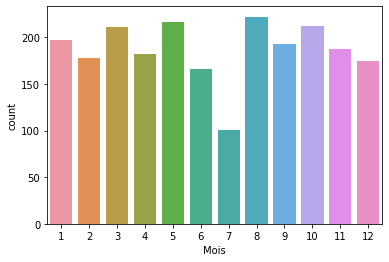

In [218]:
sns.countplot(df['Mois']);

- Chaque mois il y a des inscriptions auprès de l'entreprise
- Les clients s'inscrivent beaucoup plus au 3e, 5e, 8e et 10e mois

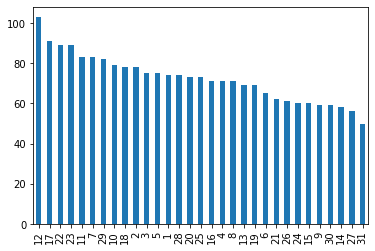

In [232]:
df['Jours'].value_counts().plot.bar()

- La majorité des inscriptions sont faites les 12 du mois

In [227]:
def periode(x):
    if 0 < x <= 3:
        text = '1er Trimestre'
    elif 3 < x <= 6:
        text = '2e Trimestre'
    elif 6 < x <= 8:
        text = '3e Trimestre'
    else:
        text = '4e Trimestre'
    return text

In [209]:
df['Trimestre'] = df['Mois'].map(periode)

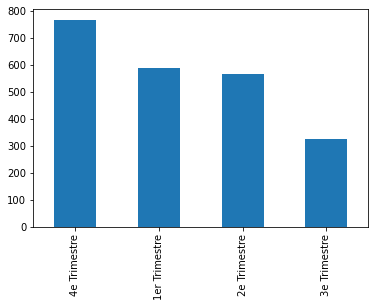

In [234]:
df['Trimestre'].value_counts().plot.bar()

In [235]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Jours,Mois,Annee,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Accept,Age,categories age,Trimestre
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,4,9,2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1,Non,64,[60-65[,4e Trimestre
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,8,3,2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0,Non,67,[65-70[,1er Trimestre
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,21,8,2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0,Non,56,[55-60[,3e Trimestre
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,10,2,2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0,Non,37,[35-40[,1er Trimestre
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,19,1,2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0,Non,40,[40-45[,1er Trimestre


- Il y a beaucoup plus d'inscription au dernier trimestre

#### Variable ID, Z_CostContact, Z_Revenue

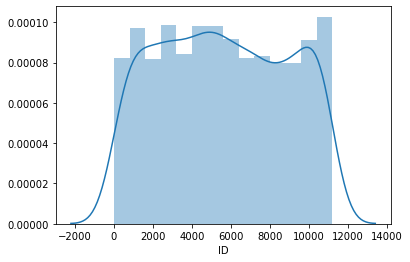

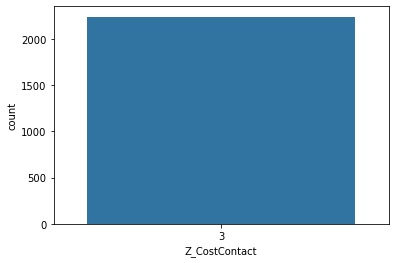

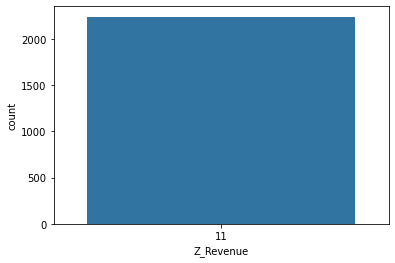

In [237]:
for col in df[['ID', 'Z_CostContact','Z_Revenue']]:
    plt.figure()
    if df[col].nunique() > 100:
        
        sns.distplot(df[col])
    else:
        sns.countplot(df[col])

- Colonne ID semble suive non seulement une loi uniforme et de plus elle est l'identifiant des clients. Ce faisant, elle est peut informative => Elle sera supprimée
- Les Variables Z_CostContact, Z_Revenue peuvent être supprimées

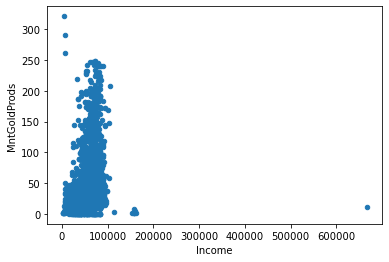

In [257]:
df.plot.scatter(x='Income', y='MntGoldProds')

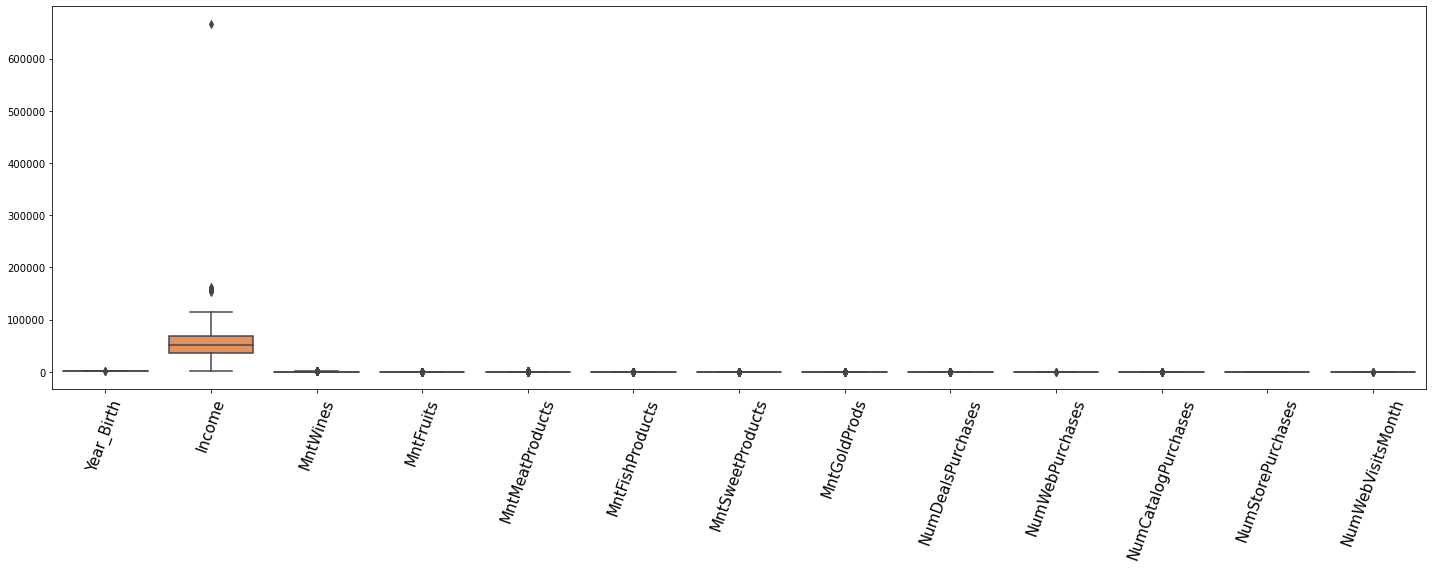

In [298]:
plt.figure(figsize=(20, 8))
sns.boxplot(data = df[['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])
plt.xticks(rotation = 70, fontsize = 15)
plt.tight_layout()

- Les variables ne sont pas sur la même échelle

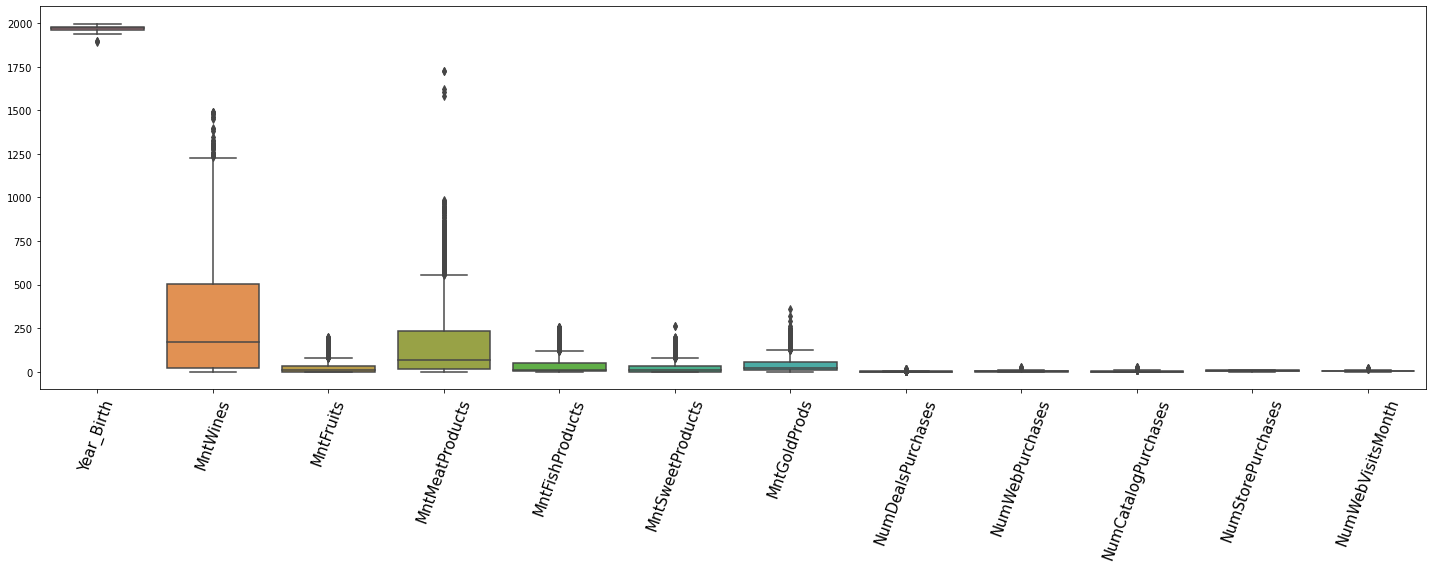

In [299]:
plt.figure(figsize=(20, 8))
sns.boxplot(data = df[['Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])
plt.xticks(rotation = 70, fontsize = 15)
plt.tight_layout()

### Valeurs manquantes

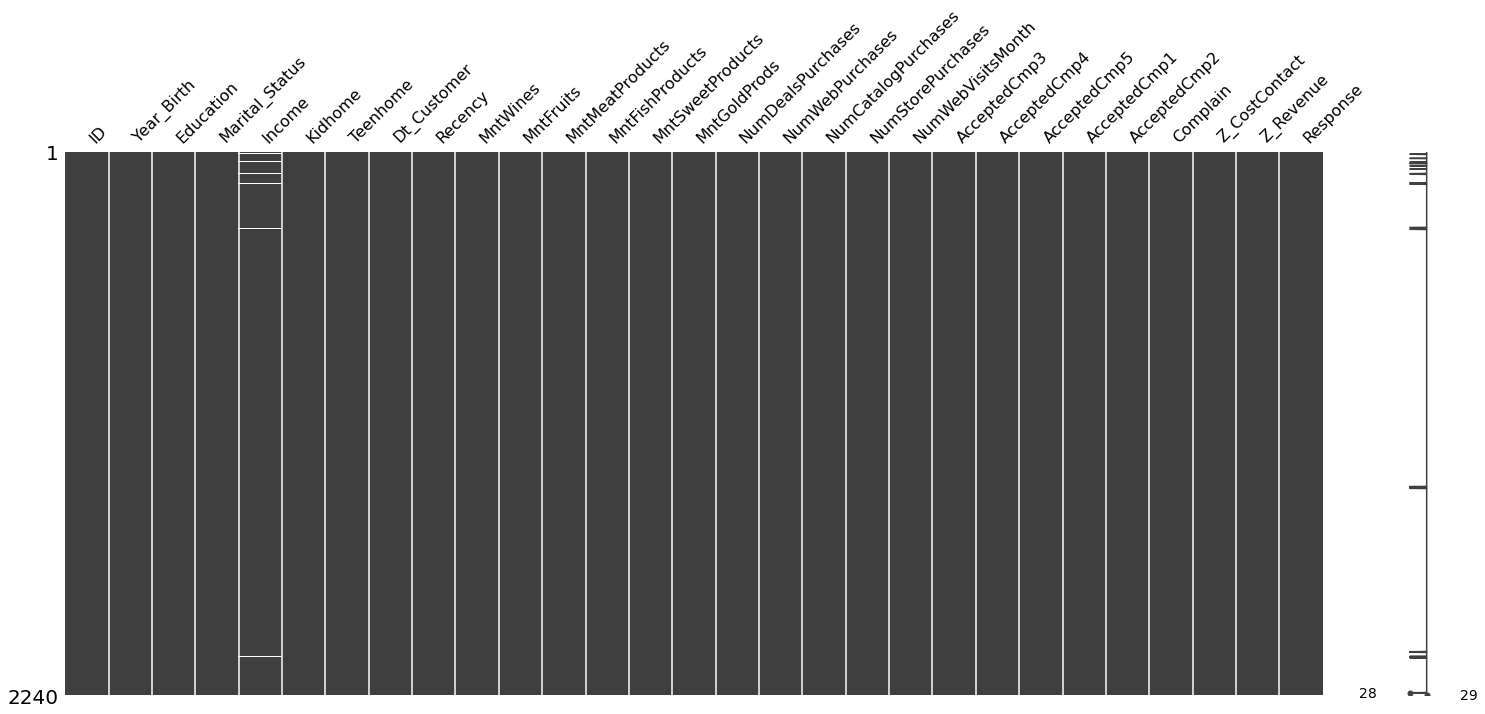

In [120]:
matrix(df.drop('Accept', axis=1))

In [123]:
(df.isna().sum()/df.shape[0] *100).sort_values(ascending=False)

Income                 1.071429
ID                     0.000000
NumWebPurchases        0.000000
Response               0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumDealsPurchases      0.000000
Year_Birth             0.000000
MntGoldProds           0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Accept                 0.000000
dtype: float64

- Il n'y a que 1% des données qui sont manquantes ( Variable Income/Revenu)

### Preprocessing

- Traitement des valeurs manquantes
- Traitement des Valeurs abérrantes
- Standardisation et/ou normalisation

In [315]:
df1 = DF.copy()

In [316]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [317]:
del df1['ID']

In [318]:
df1[df1['Income'].isna()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,3,11,0
2079,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0,0,0,0,0,0,3,11,0
2081,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0,0,0,0,0,0,3,11,0
2084,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0,0,1,0,0,0,3,11,1


- Nous supprimons les valeurs manquantes car leur pourcentage est faibles

In [319]:
df1.dropna(inplace=True)

In [320]:
df1.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [321]:
df1.shape

(2216, 28)

#### Traitement des Valeurs abérrantes

In [282]:
q1=df1["Income"].quantile(q=0.25)

#On calcule Q3

q3=df1["Income"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

df1[df1["Income"]<borne_sup]
df1[df1["Income"]>borne_inf]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [322]:
def outliers(x):
    q1=x.quantile(q=0.25)
    q3=x.quantile(q=0.75)
    IQR=q3-q1
    borne_inf = q1-1.5*IQR
    borne_sup = q3 +1.5*IQR
    
    return borne_inf, borne_sup

In [323]:
outliers(df1['Income'])

(-14525.5, 118350.5)

In [286]:
outliers(df1['Age'])

(17.0, 89.0)

In [294]:
outliers(df1['MntFishProducts'])

(-67.5, 120.5)

In [295]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [297]:
df1[['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

,Year_Birth,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,58138.0,635,88,546,172,88,88,3,8,10,4,7
1,1954,46344.0,11,1,6,2,1,6,2,1,1,2,5
2,1965,71613.0,426,49,127,111,21,42,1,8,2,10,4
3,1984,26646.0,11,4,20,10,3,5,2,2,0,4,6
4,1981,58293.0,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,709,43,182,42,118,247,2,9,3,4,5
2236,1946,64014.0,406,0,30,0,0,8,7,8,2,5,7
2237,1981,56981.0,908,48,217,32,12,24,1,2,3,13,6
2238,1956,69245.0,428,30,214,80,30,61,2,6,5,10,3


In [307]:
minimum = []
maximum = []
for col in ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
    minimum.append(outliers(df[col])[0])
    maximum.append(outliers(df[col])[1])

In [327]:
for col in ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
    print(col)
    print(outliers(df1[col]))

Year_Birth
(1932.0, 2004.0)
Income
(-14525.5, 118350.5)
MntWines
(-697.0, 1225.0)
MntFruits
(-47.0, 81.0)
MntMeatProducts
(-308.0, 556.0)
MntFishProducts
(-67.5, 120.5)
MntSweetProducts
(-47.0, 81.0)
MntGoldProds
(-61.5, 126.5)
NumDealsPurchases
(-2.0, 6.0)
NumWebPurchases
(-4.0, 12.0)
NumCatalogPurchases
(-6.0, 10.0)
NumStorePurchases
(-4.5, 15.5)
NumWebVisitsMonth
(-3.0, 13.0)


In [328]:
'NumDealsPurchases'
'Year_Birth'

'Year_Birth'

In [332]:
df1[df1['NumDealsPurchases'] == 6]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
33,1952,PhD,Divorced,46610.0,0,2,29-10-2012,8,96,12,96,33,22,43,6,4,1,6,6,0,0,0,0,0,0,3,11,1
199,1973,PhD,Single,46854.0,1,1,31-03-2014,81,96,1,79,7,1,79,6,5,1,3,8,1,0,0,0,0,0,3,11,1
207,1963,Master,Divorced,48721.0,1,1,13-05-2013,50,81,18,113,47,13,21,6,4,2,5,6,0,0,0,0,0,0,3,11,0
215,1977,Graduation,Married,41443.0,1,0,01-04-2014,79,171,7,171,25,19,89,6,8,1,5,8,0,0,0,0,0,0,3,11,0
264,1952,Master,Together,43776.0,1,1,03-02-2013,9,177,2,71,3,2,20,6,5,2,4,8,0,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,1955,Graduation,Widow,58275.0,1,1,02-06-2013,48,189,10,253,56,43,64,6,8,2,7,7,0,0,0,0,0,0,3,11,0
2162,1957,Graduation,Together,47320.0,0,1,01-08-2013,10,200,19,111,50,15,19,6,5,1,8,6,0,0,0,0,0,0,3,11,0
2205,1968,Graduation,Single,35893.0,1,1,15-10-2012,80,158,0,23,0,0,18,6,3,1,5,8,0,0,0,0,0,0,3,11,0
2210,1955,2n Cycle,Divorced,41769.0,0,1,13-02-2013,31,302,29,131,32,0,27,6,8,1,7,8,0,0,0,0,0,0,3,11,0


In [333]:
df1[df1['Year_Birth'] == 1932]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [324]:
max(minimum)

1932.0

In [325]:
min(maximum)

6.0

In [314]:
df1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [344]:
df1.select_dtypes(object).columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [347]:
enc = pd.get_dummies(df1[['Education', 'Marital_Status']])

In [351]:
df1.drop(['Education', 'Marital_Status', 'Dt_Customer','Z_CostContact', 'Z_Revenue' ], axis=1, inplace=True)

In [354]:
df1_final = pd.concat([enc, df1], axis=1)

### Modelisation

- Première approche avec l'agorithme de Kmeans

In [357]:
X_train = df1_final.values

In [359]:
from sklearn.cluster import KMeans

In [360]:
# Initialisation avec 5 classes
kmeans = KMeans(n_clusters=5, random_state=540)

kmeans.fit(X_train)

KMeans(n_clusters=5, random_state=540)

In [361]:
print(kmeans.labels_)
print(kmeans.inertia_)

[1 0 1 ... 1 1 1]
122322715239.7981


In [362]:
inertie = []

no_clusters = range(2, 20)

for i in no_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    u = kmeans.inertia_
    inertie.append(u)
    print("Inertie pour {} est : {}".format(i, u))

Inertie pour 2 est : 674581306026.6112
Inertie pour 3 est : 319371795445.0475
Inertie pour 4 est : 183213959950.19342
Inertie pour 5 est : 122323107503.3719
Inertie pour 6 est : 81039639341.76086
Inertie pour 7 est : 53553182597.63868
Inertie pour 8 est : 40088274550.09211
Inertie pour 9 est : 31039263179.346264
Inertie pour 10 est : 23850007314.700542
Inertie pour 11 est : 19045918955.345203
Inertie pour 12 est : 15363436784.648117
Inertie pour 13 est : 12958763696.933208
Inertie pour 14 est : 10948558567.293756
Inertie pour 15 est : 9265914166.73573
Inertie pour 16 est : 8088588263.48754
Inertie pour 17 est : 7166505285.438125
Inertie pour 18 est : 6290236838.838624
Inertie pour 19 est : 5566104443.3647585


In [365]:
from yellowbrick.cluster import KElbowVisualizer

Optimal number of clusters: 4


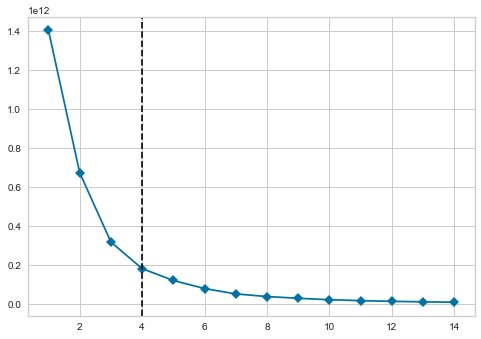

In [366]:
X = df1_final.values

kmeans = KMeans(random_state=1)
kmeans_vis = KElbowVisualizer(kmeans, k=(1,15), metric='distortion', timings=False).fit(X)
print('Optimal number of clusters:', kmeans_vis.elbow_value_)

- Dans cette première approche, nous trouvons 4 clusters
- Inertie pour 4 est : 183213959950.19342

**nous pouvons optimiser avec des methodes factorielle**